In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans

In [4]:
import sklearn.metrics as sm

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import time

In [8]:
%matplotlib inline

In [9]:
data = pd.read_csv('iris.csv')

In [10]:
data.iloc[:,:4].values

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3

In [11]:
data.iloc[:,4:].values

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

In [12]:
def convertToVals(X):
    myArray = []
    for x in X:
        if x == 'Iris-setosa':
            myArray.append(0)
        elif x == 'Iris-versicolor':
            myArray.append(1)
        else:
            myArray.append(2)
    return myArray

In [13]:
target = np.array(convertToVals(data.iloc[:,4:].values))

In [14]:
x1 = pd.DataFrame(data.iloc[:,:4].values)
x1.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

In [15]:
y1 = pd.DataFrame(target)
y1.columns = ['Targets']

In [16]:
x = pd.DataFrame(data.iloc[:,:4].values)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(target)
y.columns = ['Targets']

In [17]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0.5,1,'Petal')

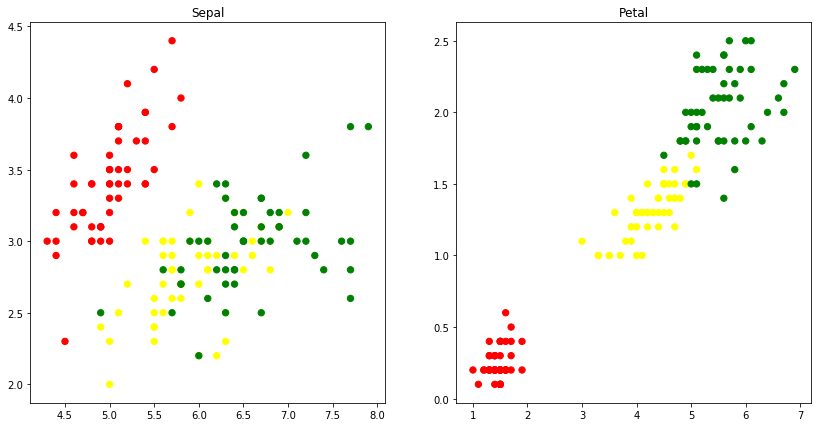

In [18]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'yellow', 'green'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(x1.Sepal_Length, x1.Sepal_Width, c=colormap[y1.Targets], s=40)
plt.title('Sepal')
 
plt.subplot(1, 2, 2)
plt.scatter(x1.Petal_Length, x1.Petal_Width, c=colormap[y1.Targets], s=40)
plt.title('Petal')

In [19]:
model = KMeans(n_clusters=3)
model.fit(x1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
# This is what KMeans thought
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5,1,'K Mean Classification')

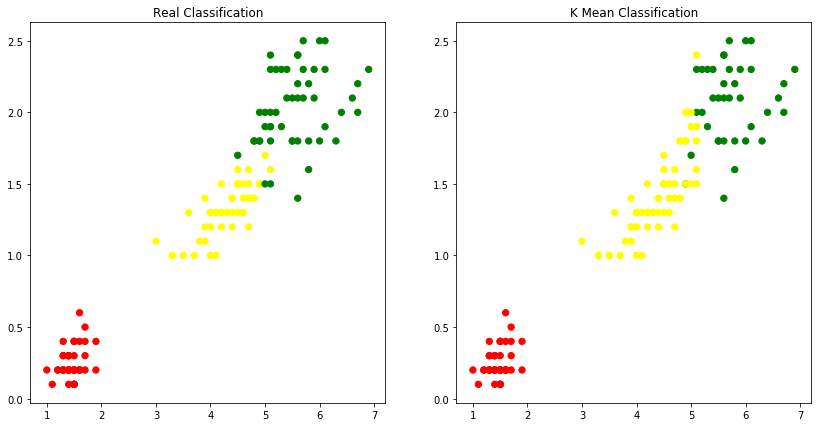

In [21]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'yellow', 'green'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x1.Petal_Length, x1.Petal_Width, c=colormap[y1.Targets], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x1.Petal_Length, x1.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')

In [29]:
# The fix, we convert all the 1s to 0s and 0s to 1s.
predY = np.choose(model.labels_, [0, 1, 2]).astype(np.int64)
print (target)
print (predY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2 2
 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2
 1]


Text(0.5,1,'K Mean Classification')

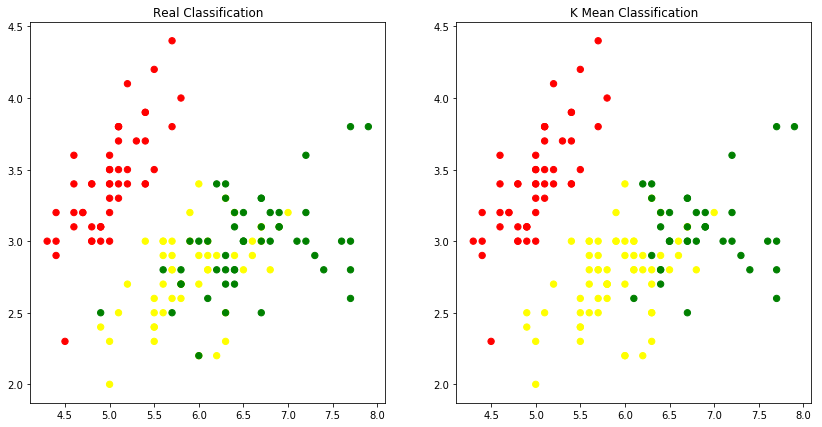

In [30]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'yellow', 'green'])
 
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(x1.Sepal_Length, x1.Sepal_Width, c=colormap[y1.Targets], s=40)
plt.title('Real Classification')
 
# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(x1.Sepal_Length, x1.Sepal_Width, c=colormap[predY], s=40)
plt.title('K Mean Classification')

In [31]:
# Performance Metrics
sm.accuracy_score(y1, predY)

0.8926174496644296

In [32]:
# Confusion Matrix
sm.confusion_matrix(y1, predY)

array([[49,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

In [33]:
start_time = time.time()
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(data.iloc[:,:4])
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.04599118232727051 seconds ---
